In [164]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout, Embedding, BatchNormalization
from keras.utils import to_categorical, pad_sequences
import spacy, random
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from pickle import dump, load

In [2]:
def read_file(filepath):
    with open(filepath,'r') as f:
        text = f.read()
    
    return text

In [3]:
text = read_file('../DATA/moby_dick_four_chapters.txt')
text

'Call me Ishmael.  Some years ago--never mind how long\nprecisely--having little or no money in my purse, and nothing\nparticular to interest me on shore, I thought I would sail about a\nlittle and see the watery part of the world.  It is a way I have of\ndriving off the spleen and regulating the circulation.  Whenever I\nfind myself growing grim about the mouth; whenever it is a damp,\ndrizzly November in my soul; whenever I find myself involuntarily\npausing before coffin warehouses, and bringing up the rear of every\nfuneral I meet; and especially whenever my hypos get such an upper\nhand of me, that it requires a strong moral principle to prevent me\nfrom deliberately stepping into the street, and methodically knocking\npeople\'s hats off--then, I account it high time to get to sea as soon\nas I can.  This is my substitute for pistol and ball.  With a\nphilosophical flourish Cato throws himself upon his sword; I quietly\ntake to the ship.  There is nothing surprising in this.  If t

In [10]:
nlp = spacy.load('en_core_web_sm',disable=['tagger','parser','ner'])

In [11]:
nlp.max_length = 20000000

In [12]:
def text_preprocess(text):
    return [token.text.lower() for token in nlp(text) if token.text not in '\n\n \n\n\n --!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n']

In [13]:
tokens = text_preprocess(text)
tokens

C:\Users\hp\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on',
 'shore',
 'i',
 'thought',
 'i',
 'would',
 'sail',
 'about',
 'a',
 'little',
 'and',
 'see',
 'the',
 'watery',
 'part',
 'of',
 'the',
 'world',
 'it',
 'is',
 'a',
 'way',
 'i',
 'have',
 'of',
 'driving',
 'off',
 'the',
 'spleen',
 'and',
 'regulating',
 'the',
 'circulation',
 'whenever',
 'i',
 'find',
 'myself',
 'growing',
 'grim',
 'about',
 'the',
 'mouth',
 'whenever',
 'it',
 'is',
 'a',
 'damp',
 'drizzly',
 'november',
 'in',
 'my',
 'soul',
 'whenever',
 'i',
 'find',
 'myself',
 'involuntarily',
 'pausing',
 'before',
 'coffin',
 'warehouses',
 'and',
 'bringing',
 'up',
 'the',
 'rear',
 'of',
 'every',
 'funeral',
 'i',
 'meet',
 'and',
 'especially',
 'whenever',
 'my',
 'hypos',
 'get',
 'such',
 'an',
 'upper',
 'hand',
 '

In [14]:
len(tokens)

11338

In [35]:
# 32 words --> model predicts 33rd word
train_len = 32 + 1
text_sequences = []

for i in range(train_len,len(tokens)):
    text_sequences.append(tokens[i-train_len:i])

In [36]:
' '.join(text_sequences[0])

'call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore i thought i would sail about'

In [37]:
len(text_sequences)

11305

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)

In [39]:
tokenizer.document_count

11305

In [40]:
tokenizer.index_word

{1: 'the',
 2: 'a',
 3: 'and',
 4: 'of',
 5: 'i',
 6: 'to',
 7: 'in',
 8: 'it',
 9: 'that',
 10: 'he',
 11: 'his',
 12: 'was',
 13: 'but',
 14: 'me',
 15: 'with',
 16: 'as',
 17: 'at',
 18: 'this',
 19: 'you',
 20: 'is',
 21: 'all',
 22: 'for',
 23: 'my',
 24: 'be',
 25: 'on',
 26: "'s",
 27: 'not',
 28: 'from',
 29: 'there',
 30: 'one',
 31: 'up',
 32: 'what',
 33: 'him',
 34: 'so',
 35: 'bed',
 36: 'now',
 37: 'about',
 38: 'no',
 39: 'into',
 40: 'by',
 41: 'were',
 42: 'out',
 43: 'or',
 44: 'harpooneer',
 45: 'had',
 46: 'then',
 47: 'have',
 48: 'an',
 49: 'upon',
 50: 'little',
 51: 'some',
 52: 'old',
 53: 'like',
 54: 'if',
 55: 'they',
 56: 'do',
 57: 'over',
 58: 'landlord',
 59: 'would',
 60: 'thought',
 61: 'room',
 62: 'when',
 63: 'could',
 64: "n't",
 65: 'night',
 66: 'here',
 67: 'head',
 68: 'such',
 69: 'which',
 70: 'man',
 71: 'did',
 72: 'sea',
 73: 'time',
 74: 'other',
 75: 'very',
 76: 'go',
 77: 'these',
 78: 'more',
 79: 'though',
 80: 'first',
 81: 'sort',


In [41]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'i': 5,
 'to': 6,
 'in': 7,
 'it': 8,
 'that': 9,
 'he': 10,
 'his': 11,
 'was': 12,
 'but': 13,
 'me': 14,
 'with': 15,
 'as': 16,
 'at': 17,
 'this': 18,
 'you': 19,
 'is': 20,
 'all': 21,
 'for': 22,
 'my': 23,
 'be': 24,
 'on': 25,
 "'s": 26,
 'not': 27,
 'from': 28,
 'there': 29,
 'one': 30,
 'up': 31,
 'what': 32,
 'him': 33,
 'so': 34,
 'bed': 35,
 'now': 36,
 'about': 37,
 'no': 38,
 'into': 39,
 'by': 40,
 'were': 41,
 'out': 42,
 'or': 43,
 'harpooneer': 44,
 'had': 45,
 'then': 46,
 'have': 47,
 'an': 48,
 'upon': 49,
 'little': 50,
 'some': 51,
 'old': 52,
 'like': 53,
 'if': 54,
 'they': 55,
 'do': 56,
 'over': 57,
 'landlord': 58,
 'would': 59,
 'thought': 60,
 'room': 61,
 'when': 62,
 'could': 63,
 "n't": 64,
 'night': 65,
 'here': 66,
 'head': 67,
 'such': 68,
 'which': 69,
 'man': 70,
 'did': 71,
 'sea': 72,
 'time': 73,
 'other': 74,
 'very': 75,
 'go': 76,
 'these': 77,
 'more': 78,
 'though': 79,
 'first': 80,
 'sort': 81,


In [42]:
tokenizer.word_docs

defaultdict(int,
            {'to': 5986,
             'call': 34,
             'purse': 55,
             'having': 177,
             'ishmael': 168,
             'interest': 24,
             'on': 2022,
             'would': 853,
             'mind': 206,
             'and': 8116,
             'thought': 831,
             'little': 906,
             'money': 125,
             'shore': 27,
             'in': 5615,
             'precisely': 44,
             'ago': 105,
             'long': 445,
             'particular': 187,
             'my': 1990,
             'never': 552,
             'how': 405,
             'me': 2386,
             'about': 1261,
             'some': 882,
             'sail': 131,
             'or': 958,
             'nothing': 324,
             'years': 170,
             'no': 1237,
             'i': 6035,
             'a': 7688,
             'see': 500,
             'the': 9165,
             'watery': 33,
             'part': 297,
             'of': 6874,
     

In [30]:
tokenizer.word_counts

OrderedDict([('call', 34),
             ('me', 3129),
             ('ishmael', 168),
             ('some', 961),
             ('years', 170),
             ('ago', 105),
             ('never', 568),
             ('mind', 206),
             ('how', 405),
             ('long', 472),
             ('precisely', 44),
             ('having', 177),
             ('little', 970),
             ('or', 1202),
             ('no', 1269),
             ('money', 148),
             ('in', 7159),
             ('my', 2262),
             ('purse', 85),
             ('and', 12229),
             ('nothing', 351),
             ('particular', 187),
             ('to', 8240),
             ('interest', 24),
             ('on', 2171),
             ('shore', 27),
             ('i', 9067),
             ('thought', 854),
             ('would', 889),
             ('sail', 131),
             ('about', 1287),
             ('a', 13170),
             ('see', 528),
             ('the', 19718),
             ('watery', 33),

In [43]:
sequences = tokenizer.texts_to_sequences(text_sequences)
sequences

[[956,
  14,
  263,
  51,
  261,
  408,
  87,
  219,
  129,
  111,
  954,
  260,
  50,
  43,
  38,
  314,
  7,
  23,
  546,
  3,
  150,
  259,
  6,
  2713,
  14,
  25,
  2711,
  5,
  60,
  5,
  59,
  406,
  37],
 [14,
  263,
  51,
  261,
  408,
  87,
  219,
  129,
  111,
  954,
  260,
  50,
  43,
  38,
  314,
  7,
  23,
  546,
  3,
  150,
  259,
  6,
  2713,
  14,
  25,
  2711,
  5,
  60,
  5,
  59,
  406,
  37,
  2],
 [263,
  51,
  261,
  408,
  87,
  219,
  129,
  111,
  954,
  260,
  50,
  43,
  38,
  314,
  7,
  23,
  546,
  3,
  150,
  259,
  6,
  2713,
  14,
  25,
  2711,
  5,
  60,
  5,
  59,
  406,
  37,
  2,
  50],
 [51,
  261,
  408,
  87,
  219,
  129,
  111,
  954,
  260,
  50,
  43,
  38,
  314,
  7,
  23,
  546,
  3,
  150,
  259,
  6,
  2713,
  14,
  25,
  2711,
  5,
  60,
  5,
  59,
  406,
  37,
  2,
  50,
  3],
 [261,
  408,
  87,
  219,
  129,
  111,
  954,
  260,
  50,
  43,
  38,
  314,
  7,
  23,
  546,
  3,
  150,
  259,
  6,
  2713,
  14,
  25,
  2711,
  5,
  60,

In [45]:
len(sequences)

11305

In [47]:
for enc in sequences[0]:
    print(f"{enc} --> {tokenizer.index_word[enc]}")

956 --> call
14 --> me
263 --> ishmael
51 --> some
261 --> years
408 --> ago
87 --> never
219 --> mind
129 --> how
111 --> long
954 --> precisely
260 --> having
50 --> little
43 --> or
38 --> no
314 --> money
7 --> in
23 --> my
546 --> purse
3 --> and
150 --> nothing
259 --> particular
6 --> to
2713 --> interest
14 --> me
25 --> on
2711 --> shore
5 --> i
60 --> thought
5 --> i
59 --> would
406 --> sail
37 --> about


In [48]:
for no in sequences[5]:
    print(f"{no} --> {tokenizer.index_word[no]}")

408 --> ago
87 --> never
219 --> mind
129 --> how
111 --> long
954 --> precisely
260 --> having
50 --> little
43 --> or
38 --> no
314 --> money
7 --> in
23 --> my
546 --> purse
3 --> and
150 --> nothing
259 --> particular
6 --> to
2713 --> interest
14 --> me
25 --> on
2711 --> shore
5 --> i
60 --> thought
5 --> i
59 --> would
406 --> sail
37 --> about
2 --> a
50 --> little
3 --> and
94 --> see
1 --> the


In [52]:
sequences = np.array(sequences)
sequences

array([[ 956,   14,  263, ...,   59,  406,   37],
       [  14,  263,   51, ...,  406,   37,    2],
       [ 263,   51,  261, ...,   37,    2,   50],
       ...,
       [  97,  336,  301, ...,  262,   53,    2],
       [ 336,  301,    1, ...,   53,    2, 2718],
       [ 301,    1,  407, ...,    2, 2718,   26]])

In [54]:
# Feature Matrix
X = sequences[:,:-1]
# Target Label
y = sequences[:,-1]

In [56]:
vocabulary_size = len(tokenizer.word_counts)
vocabulary_size

2718

In [57]:
X.shape

(11305, 32)

In [58]:
seq_len = X.shape[1]
seq_len

32

In [59]:
y = to_categorical(y,num_classes=vocabulary_size+1)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
y.shape

(11305, 2719)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
def create_model(vocabulary_size,seq_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocabulary_size+1,output_dim=seq_len,input_length=seq_len))
    model.add(LSTM(units=64,return_sequences=True))
    model.add(LSTM(units=128))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
#     model.add(LSTM(units=256))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))
#     model.add(Dense(units=128,activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))
    model.add(Dense(units=vocabulary_size+1,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
    model.summary()
    return model

In [72]:
model = create_model(vocabulary_size,seq_len)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 32, 32)            87008     
                                                                 
 lstm_7 (LSTM)               (None, 32, 64)            24832     
                                                                 
 lstm_8 (LSTM)               (None, 128)               98816     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 2719)              350751    
                                                      

In [76]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,verbose=1,mode='max',restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=10,mode='max',factor=0.1,min_lr=0.001,verbose=1)
model_checkpoint = ModelCheckpoint('checkpoint/',monitor='val_accuracy',mode='max',save_best_only=True,save_weights_only=True,verbose=1)

r = model.fit(X_train,
          y_train,
          batch_size=128,
          epochs=50,
          verbose=2,
          validation_data=(X_test,y_test),
          callbacks=[model_checkpoint,reduce_lr,early_stopping])

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.04776, saving model to checkpoint\
62/62 - 3s - loss: 0.2115 - accuracy: 0.9463 - val_loss: 14.3933 - val_accuracy: 0.0478 - lr: 0.0010 - 3s/epoch - 49ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.04776 to 0.05130, saving model to checkpoint\
62/62 - 5s - loss: 0.2012 - accuracy: 0.9459 - val_loss: 14.4199 - val_accuracy: 0.0513 - lr: 0.0010 - 5s/epoch - 83ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.05130 to 0.05218, saving model to checkpoint\
62/62 - 2s - loss: 0.1942 - accuracy: 0.9468 - val_loss: 13.6909 - val_accuracy: 0.0522 - lr: 0.0010 - 2s/epoch - 38ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.05218 to 0.05572, saving model to checkpoint\
62/62 - 2s - loss: 0.1861 - accuracy: 0.9508 - val_loss: 13.6038 - val_accuracy: 0.0557 - lr: 0.0010 - 2s/epoch - 39ms/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.05572
62/62 - 2s - loss: 0.1908 - accuracy: 0.9507 - val_loss: 14.


Epoch 43: val_accuracy did not improve from 0.06840
62/62 - 2s - loss: 0.0710 - accuracy: 0.9814 - val_loss: 16.7928 - val_accuracy: 0.0628 - lr: 0.0010 - 2s/epoch - 35ms/step
Epoch 44/50

Epoch 44: val_accuracy did not improve from 0.06840
62/62 - 2s - loss: 0.0743 - accuracy: 0.9786 - val_loss: 17.5027 - val_accuracy: 0.0548 - lr: 0.0010 - 2s/epoch - 35ms/step
Epoch 45/50

Epoch 45: val_accuracy did not improve from 0.06840
62/62 - 2s - loss: 0.0788 - accuracy: 0.9784 - val_loss: 16.5725 - val_accuracy: 0.0649 - lr: 0.0010 - 2s/epoch - 35ms/step
Epoch 46/50

Epoch 46: val_accuracy did not improve from 0.06840
62/62 - 2s - loss: 0.0857 - accuracy: 0.9754 - val_loss: 17.3184 - val_accuracy: 0.0637 - lr: 0.0010 - 2s/epoch - 35ms/step
Epoch 47/50

Epoch 47: val_accuracy did not improve from 0.06840
62/62 - 2s - loss: 0.0809 - accuracy: 0.9785 - val_loss: 17.8415 - val_accuracy: 0.0557 - lr: 0.0010 - 2s/epoch - 35ms/step
Epoch 48/50

Epoch 48: val_accuracy did not improve from 0.06840
62

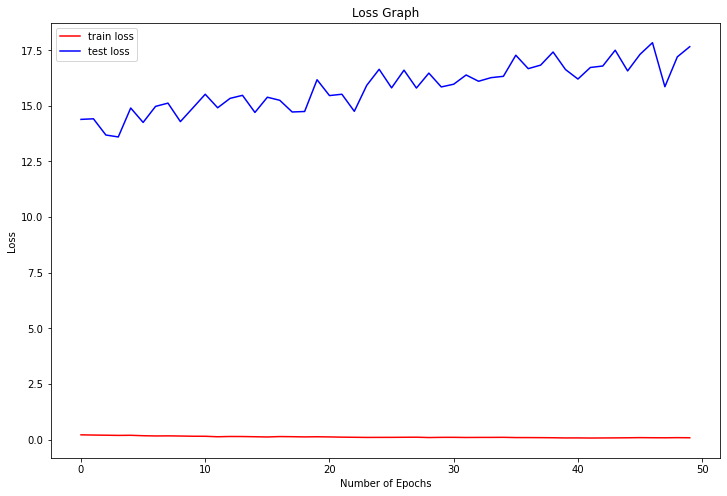

In [77]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

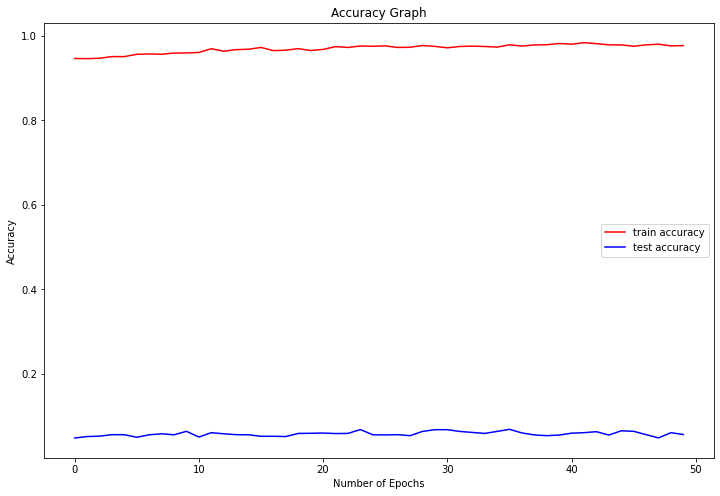

In [78]:
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [79]:
model.evaluate(X_test,y_test)

106/106 [==============================] - 1s 9ms/step - loss: 17.6615 - accuracy: 0.0560


[17.661508560180664, 0.05601415038108826]

In [81]:
predictions = model.predict(X_test)
predictions

106/106 [==============================] - 1s 5ms/step


array([[5.7803740e-09, 3.1161928e-06, 2.7306688e-09, ..., 2.5168941e-07,
        4.9752469e-08, 3.9880645e-09],
       [5.9639441e-13, 4.6758212e-30, 8.1652997e-28, ..., 2.8208673e-09,
        6.4084090e-12, 5.4429145e-13],
       [1.4047934e-20, 3.3789938e-08, 1.8523831e-05, ..., 5.1694497e-19,
        7.7000319e-16, 1.0663322e-20],
       ...,
       [2.2610314e-13, 1.5629181e-09, 1.6513303e-10, ..., 3.4920437e-16,
        5.7244208e-14, 1.5306989e-13],
       [2.2198980e-18, 2.5930292e-17, 1.4330746e-10, ..., 7.7759204e-18,
        2.8368149e-17, 2.5510256e-18],
       [3.7857180e-09, 2.5520042e-18, 4.7138353e-14, ..., 2.0458279e-04,
        2.2081920e-05, 3.5575811e-09]], dtype=float32)

In [86]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [94]:
' '.join(text_sequences[0])

'call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore i thought i would sail about'

In [95]:
test_seq = sequences[0]
test_seq = test_seq.reshape(-1,1)
test_seq

array([[ 956],
       [  14],
       [ 263],
       [  51],
       [ 261],
       [ 408],
       [  87],
       [ 219],
       [ 129],
       [ 111],
       [ 954],
       [ 260],
       [  50],
       [  43],
       [  38],
       [ 314],
       [   7],
       [  23],
       [ 546],
       [   3],
       [ 150],
       [ 259],
       [   6],
       [2713],
       [  14],
       [  25],
       [2711],
       [   5],
       [  60],
       [   5],
       [  59],
       [ 406],
       [  37]])

In [105]:
predictions = model.predict(test_seq)
predictions

2/2 [==============================] - 0s 6ms/step


array([[1.25690847e-10, 3.72841721e-03, 1.54155388e-01, ...,
        1.97107504e-11, 7.07907475e-08, 1.80092941e-10],
       [4.38472980e-10, 1.68588391e-04, 6.44878373e-02, ...,
        1.12286819e-10, 1.61912851e-07, 6.26117214e-10],
       [2.04566697e-10, 9.99992881e-06, 3.26386802e-02, ...,
        4.27904552e-11, 1.83664440e-07, 2.97835867e-10],
       ...,
       [1.64603531e-09, 1.63321360e-03, 1.31568506e-01, ...,
        2.60136246e-10, 3.78438500e-07, 2.39508124e-09],
       [9.36996227e-12, 4.65322286e-04, 8.54159057e-01, ...,
        1.21003966e-12, 5.66909319e-09, 1.25437065e-11],
       [6.48799237e-10, 1.15143928e-04, 1.47995159e-01, ...,
        4.13017225e-11, 1.30113676e-07, 9.43824241e-10]], dtype=float32)

In [106]:
predictions.shape

(33, 2719)

In [107]:
predictions = predictions.argmax(axis=1)
predictions

array([ 18, 108, 128, 108,  75,  18,  75,   2, 128, 128,  18,   2,  18,
       128, 108,   2,  18, 108,   2, 128,  18,   2,  75, 108, 108,  18,
       108, 128,   2, 128,  18,   2,  18], dtype=int64)

In [108]:
tokenizer.index_word[predictions[0]]

'this'

In [110]:
for idx in predictions:
    print(tokenizer.index_word[idx])

this
place
made
place
very
this
very
a
made
made
this
a
this
made
place
a
this
place
a
made
this
a
very
place
place
this
place
made
a
made
this
a
this


In [112]:
dump(tokenizer,open('mytokenizer','wb'))

In [160]:
def generate_text(model,tokenizer,seq_len,seed_text,num_words):
    output_text = []
    input_text = seed_text
    
    for i in range(num_words):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        pad_text = pad_sequences([encoded_text],maxlen=seq_len)
        predictions = model.predict(pad_text,verbose=0)[0]
        pred_word = tokenizer.index_word[predictions.argmax()]
        input_text += ' ' + pred_word
        output_text.append(pred_word)
    
    return ' '.join(output_text)

In [161]:
random.seed(42)
random_seed_text = text_sequences[random.randint(0,len(text_sequences))]
random_seed_text

['a',
 'horse',
 'collar',
 'and',
 'suddenly',
 'felt',
 'a',
 'slight',
 'scratch',
 'throwing',
 'aside',
 'the',
 'counterpane',
 'there',
 'lay',
 'the',
 'tomahawk',
 'sleeping',
 'by',
 'the',
 'savage',
 "'s",
 'side',
 'as',
 'if',
 'it',
 'were',
 'a',
 'hatchet',
 'faced',
 'baby',
 'a',
 'pretty']

In [162]:
seed_text = ' '.join(random_seed_text)
seed_text

"a horse collar and suddenly felt a slight scratch throwing aside the counterpane there lay the tomahawk sleeping by the savage 's side as if it were a hatchet faced baby a pretty"

In [169]:
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_words=50)

'pickle truly thought i abed here in a strange house civilized a small degree civilized his very deal feet not boots with you as cool to fine stature ye he in such a further angle of a seeing that if it was there produced been a curious like deformed image'

In [165]:
big_model = load_model('epoch250.h5')